In [1]:
import janitor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes = pd.read_csv('diabetes.csv').clean_names()

In [3]:
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies                 768 non-null int64
glucose                     768 non-null int64
bloodpressure               768 non-null int64
skinthickness               768 non-null int64
insulin                     768 non-null int64
bmi                         768 non-null float64
diabetespedigreefunction    768 non-null float64
age                         768 non-null int64
outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

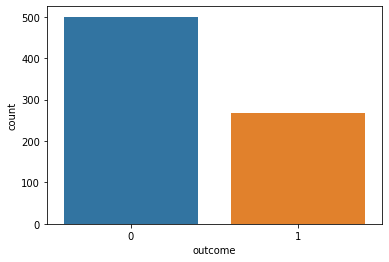

In [6]:
sns.countplot(diabetes['outcome'])

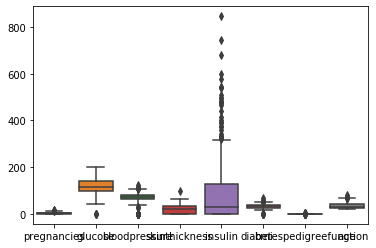

In [7]:
sns.boxplot(data=diabetes.drop(['outcome'], axis=1))

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(diabetes.drop(['outcome'], axis=1))

C:\Users\cyro_\Anaconda3Novo\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
diabetes_standard = scaler.transform(diabetes.drop(['outcome'], axis=1))

C:\Users\cyro_\Anaconda3Novo\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [12]:
diabetes_standard

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

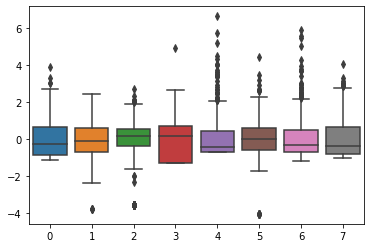

In [13]:
sns.boxplot(data=diabetes_standard)

In [14]:
diabetes_standard = pd.DataFrame(diabetes_standard, columns = diabetes.columns[:-1])

In [15]:
diabetes_standard.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_standard, diabetes['outcome'], 
                                                   test_size=0.3, random_state=9, stratify = diabetes['outcome'])

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
knn.score(X_train, y_train)

1.0

In [23]:
y_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
print(accuracy_score(y_test, y_pred))

[[124  26]
 [ 39  42]]


              precision    recall  f1-score   support

           0       0.76      0.83      0.79       150
           1       0.62      0.52      0.56        81

   micro avg       0.72      0.72      0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231



0.7186147186147186


In [26]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

Text(0, 0.5, 'Error Rate')

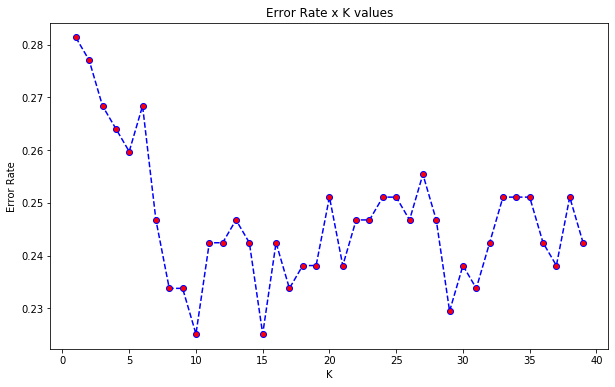

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='b', ls='--', marker='o', markerfacecolor='r')
plt.title('Error Rate x K values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [30]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print(accuracy_score(y_test, pred))

[[142   8]
 [ 47  34]]


              precision    recall  f1-score   support

           0       0.75      0.95      0.84       150
           1       0.81      0.42      0.55        81

   micro avg       0.76      0.76      0.76       231
   macro avg       0.78      0.68      0.70       231
weighted avg       0.77      0.76      0.74       231



0.7619047619047619


In [31]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print(accuracy_score(y_test, pred))

[[142   8]
 [ 47  34]]


              precision    recall  f1-score   support

           0       0.75      0.95      0.84       150
           1       0.81      0.42      0.55        81

   micro avg       0.76      0.76      0.76       231
   macro avg       0.78      0.68      0.70       231
weighted avg       0.77      0.76      0.74       231



0.7619047619047619
